In [32]:
# loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix

In [6]:
# EDA in pandas for Titanic dataset
titanic = pd.read_csv('/home/ignat/Downloads/titanic.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
# how many observations?
print(titanic.shape)

(891, 12)


In [8]:
print(titanic.info)

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [9]:
# like a summary() in R
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# stats for factors
titanic.describe(include=['object','bool'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Connaghton, Mr. Michael",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [12]:
# how many NAs?
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

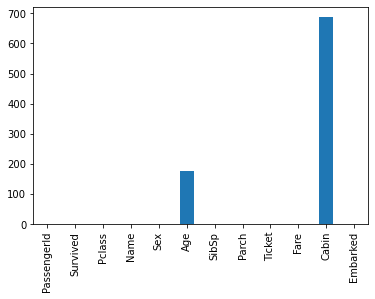

In [13]:
# let's have a look
titanic.isna().sum().plot(kind='bar')

In [36]:
# not the best solution, but the simplest
titanic = titanic.replace(np.nan,0)

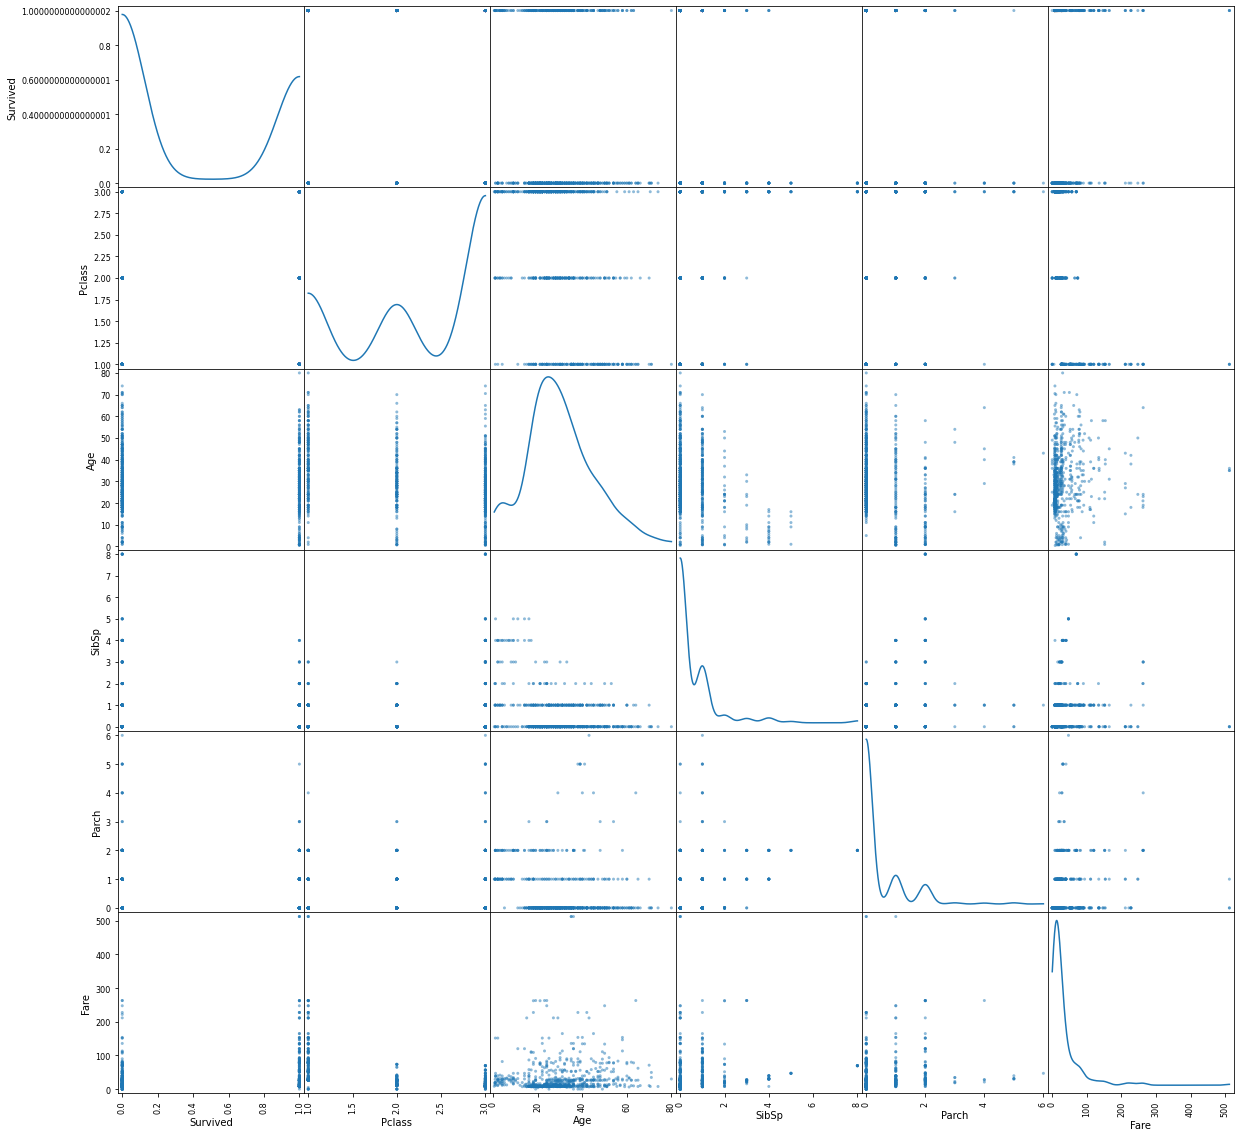

In [30]:
# to see distributions
pd.plotting.scatter_matrix(titanic.iloc[:, 1:], alpha=0.5, figsize=(20, 20), diagonal='kde')
plt.show()

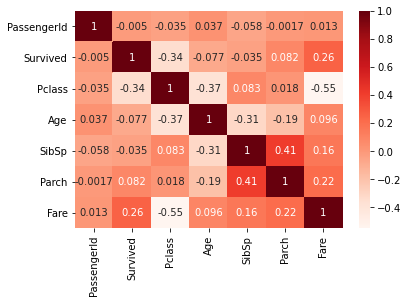

In [31]:
# to see any correlations
corr_res = titanic.corr()
sns.heatmap(corr_res,
            xticklabels=corr_res.columns.values,
            yticklabels=corr_res.columns.values, annot=True, cmap = 'Reds')
plt.show()

In [38]:
train_ATGC = pd.read_csv('https://raw.githubusercontent.com/Serfentum/bf_course/master/14.pandas/train.csv')
train_ATGC.head(10)
# we need only columns 0,6,7,8,9

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN
5,284,8048,7094,104,864,241,24.0,57.0,26.0,NaN,0.002687,0.002429,NaN,0.006792
6,285,8046,679,3245,4134,5,113.0,87.0,3054.0,NaN,0.013775,0.378969,NaN,0.010085
7,286,8041,363,3473,4215,9,NaN,171.0,123.0,3196.0,NaN,0.014827,0.396426,0.020433
8,287,8044,4665,646,2743,69,68.0,287.0,NaN,300.0,0.007369,NaN,0.037132,0.035034
9,288,8046,3443,1867,2752,431,NaN,200.0,27.0,1639.0,NaN,0.003225,0.203715,0.024011


In [34]:
train_ATGC.isna().sum()
# NA's found. Replacing them w/0's


pos            0
reads_all      0
matches        0
mismatches     0
deletions      0
insertions     0
A             18
C             15
T             14
G             16
A_fraction    18
T_fraction    14
G_fraction    16
C_fraction    15
dtype: int64

In [37]:
train_ATGC = train_ATGC.fillna(0)

In [39]:
plot_data = train_ATGC.iloc[:, [0, 6, 7, 8, 9]]
plot_data = plot_data.set_index('pos')

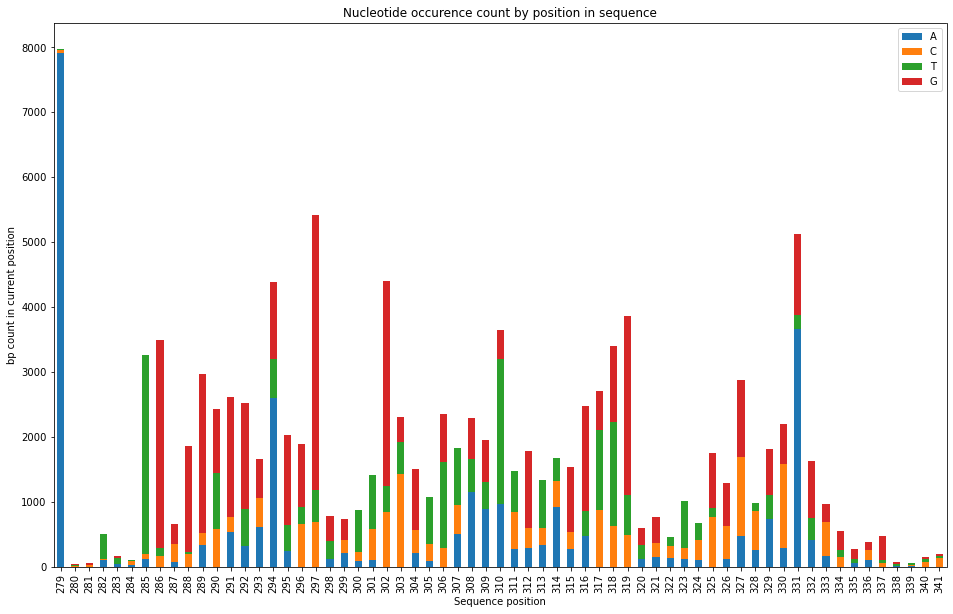

In [47]:
plot_data.plot(kind='bar', stacked=True, figsize=(16, 10))

plt.title('Nucleotide occurence count by position in sequence')
plt.xlabel('Position in sequence ')
plt.ylabel('bp count in current position')
plt.show()
# how to build(almost)consensus logo plot 101

In [45]:
# what if we change to percentage count?
plot2_data = train_ATGC.iloc[:, [0, 10, 11, 12, 13]]
plot2_data = plot2_data.set_index('pos')

In [1]:
plot2_data.plot(kind='bar', stacked=True, figsize=(16, 10))

plt.title('Nucleotide fractions by position in sequence')
plt.xlabel('Position in sequence ')
plt.ylabel('bp fraction in current position')
plt.show()
# truly consensus logo

NameError: name 'plot2_data' is not defined

In [54]:
# last task
train_ATGC_selected = train_ATGC.loc[train_ATGC['matches']>train_ATGC['matches'].mean(), ['pos', 'reads_all', 'mismatches', 'deletions', 'insertions']]
train_ATGC_selected.to_csv('/home/ignat/Downloads/train_ATGC_selected.csv')
# ez